In [2]:
import numpy as np 
import pandas as pd

import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use('ggplot')                     # background grid aesthetics

import mysql.connector as mariadb
from dotenv import load_dotenv              # environment variables
import os

In [3]:
# load the environment variables
load_dotenv()

# assign environment variables
PASSWORD = os.getenv('MariaDB_Password')

Function
- retrieve data from Loan Table

In [4]:
def get_loan_data():
    try:
        # establish connection to MariaDB
        con = mariadb.connect(
            host='localhost',
            user='root',
            password=PASSWORD,
            database='creditcard_capstone'
        )
        print('Connected to MariaDB database...')

        # create a cursor
        cur = con.cursor()
        # SQL statement
        query = ''' 
        SELECT *
        FROM cdw_sapp_loan_application
        '''
        # execute SQL statement
        cur.execute(query)

        # convert results to pandas dataframe
        loan_df = pd.DataFrame(cur, columns=['Application_ID', 
                                            'Application_Status', 
                                            'Credit_History', 
                                            'Dependents', 
                                            'Education', 
                                            'Gender', 
                                            'Income', 
                                            'Married', 
                                            'Property_Area', 
                                            'Self_Employed'])
        # close connection to MariaDB
        con.close()
        print('Connection closed...')

        return loan_df
    except mariadb.ERROR as err:
        print(err)

Pandas Dataframe
- loan_df

In [5]:
loan_df = get_loan_data()
loan_df.head()

Connected to MariaDB database...
Connection closed...


,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP001002,Y,1,0,Graduate,Male,medium,No,Urban,No
1,LP001003,N,1,1,Graduate,Male,medium,Yes,Rural,No
2,LP001005,Y,1,0,Graduate,Male,low,Yes,Urban,Yes
3,LP001006,Y,1,0,Not Graduate,Male,low,Yes,Urban,No
4,LP001008,Y,1,0,Graduate,Male,medium,No,Urban,No


Data Visualization
- DUNKIN' DONUT chart (VS Code runs on DUNKIN')

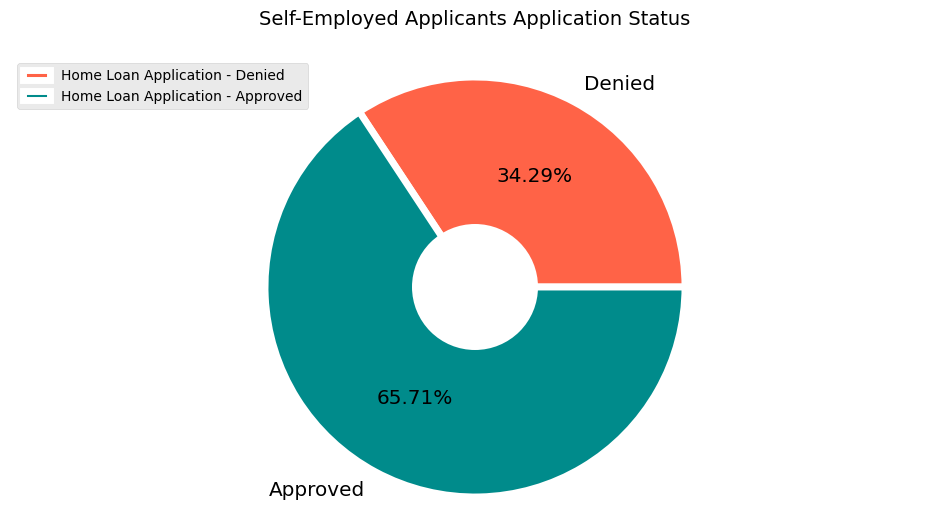

In [174]:
# Find and plot the percentage of applications approved for self-employed applicants.

# filter for only self_employed applicants
self_employed = loan_df['Self_Employed'] == 'Yes'
self_employed_df = loan_df[self_employed]

# convert categorical data -> numerical data
application_status_df = pd.get_dummies(self_employed_df['Application_Status'])                              # convert 1 column -> 2 columns
application_status_df.columns = ['Denied', 'Approved']                                                      # rename the columns
application_status_df = application_status_df.sum()                                                         # get sum for each category
#-----------------------------------------------------------------------------
# donut chart
application_status_df.plot(kind='pie', 
                           autopct='%.2f%%', 
                           colors=['tomato', 'darkcyan'],
                           wedgeprops={'linewidth': 5, 'linestyle': 'solid', 'edgecolor':'white'},
                           textprops={'size': 'x-large'},
                           figsize=(12, 6))
#-----------------------------------------------------------------------------
# create center circle - https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/
center_circle = plt.Circle(xy=(0, 0),                                                                       # set the location
                           radius=0.3,                                                                      # set the size
                           facecolor='white')                                                               # set the color 
fig = plt.gcf()                                                                                             # get current figure
  
# adding center circle to pie chart
fig.gca().add_artist(center_circle)                                                                         # get current axes to add circle
#-----------------------------------------------------------------------------
plt.axis('equal')                                                                                           # aesthetics
plt.title('Self-Employed Applicants Application Status', fontsize=14, y=1.05)                               # move the title up
plt.legend(['Home Loan Application - Denied', 'Home Loan Application - Approved'], loc='upper left')        # customize legend labels
plt.show()